In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon/Pokemon.csv
/kaggle/input/pokemon-images-and-types/pokemon.csv
/kaggle/input/pokemon-images-and-types/images/images/luxio.png
/kaggle/input/pokemon-images-and-types/images/images/oshawott.png
/kaggle/input/pokemon-images-and-types/images/images/parasect.png
/kaggle/input/pokemon-images-and-types/images/images/taillow.png
/kaggle/input/pokemon-images-and-types/images/images/porygon.png
/kaggle/input/pokemon-images-and-types/images/images/feraligatr.png
/kaggle/input/pokemon-images-and-types/images/images/eelektross.png
/kaggle/input/pokemon-images-and-types/images/images/scyther.png
/kaggle/input/pokemon-images-and-types/images/images/magmar.png
/kaggle/input/pokemon-images-and-types/images/images/swalot.png
/kaggle/input/pokemon-images-and-types/images/images/magneton.png
/kaggle/input/pokemon-images-and-types/images/images/skitty.png
/kaggle/input/pokemon-images-and-types/images/images/stunfisk.png
/kaggle/input/pokemon-images-and-types/images/images/clawitzer.pn

In [3]:
pokemon_stats = pd.read_csv('/kaggle/input/pokemon/Pokemon.csv')
pokemon_images = pd.read_csv('/kaggle/input/pokemon-images-and-types/pokemon.csv')

In [4]:
pokemon_stats

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [5]:
# From examination, it appears that there are some pokemon in the stats dataset that are not in the images dataset (e.g. VenusaurMega)
pokemon_images

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,NaN
807,meltan,Steel,NaN


In [6]:
pokemon_stats['lower_names'] = pokemon_stats['Name'].apply(lambda x: x.lower())

In [7]:
# merge the images and the stats together so we can extract images where possible
pokemon_full = pokemon_stats.merge(pokemon_images,how='left',left_on='lower_names',right_on='Name')

In [8]:
pokemon_full

,#,Name_x,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,lower_names,Name_y,Type1,Type2
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,bulbasaur,bulbasaur,Grass,Poison
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,ivysaur,ivysaur,Grass,Poison
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,venusaur,venusaur,Grass,Poison
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,venusaurmega venusaur,NaN,NaN,NaN
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,charmander,charmander,Fire,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,diancie,diancie,Rock,Fairy
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,dianciemega diancie,NaN,NaN,NaN
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,hoopahoopa confined,NaN,NaN,NaN
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,hoopahoopa unbound,NaN,NaN,NaN


In [9]:
# here are all of the pokemon missing from the images set based on our join - looks like there are some that would have matches if we reformat the names to match
pokemon_full[pokemon_full['Name_y'].isna()]['Name_x'].tolist()

['VenusaurMega Venusaur',
 'CharizardMega Charizard X',
 'CharizardMega Charizard Y',
 'BlastoiseMega Blastoise',
 'BeedrillMega Beedrill',
 'PidgeotMega Pidgeot',
 'Nidoran♀',
 'Nidoran♂',
 'AlakazamMega Alakazam',
 'SlowbroMega Slowbro',
 "Farfetch'd",
 'GengarMega Gengar',
 'KangaskhanMega Kangaskhan',
 'Mr. Mime',
 'PinsirMega Pinsir',
 'GyaradosMega Gyarados',
 'AerodactylMega Aerodactyl',
 'MewtwoMega Mewtwo X',
 'MewtwoMega Mewtwo Y',
 'AmpharosMega Ampharos',
 'SteelixMega Steelix',
 'ScizorMega Scizor',
 'HeracrossMega Heracross',
 'HoundoomMega Houndoom',
 'TyranitarMega Tyranitar',
 'SceptileMega Sceptile',
 'BlazikenMega Blaziken',
 'SwampertMega Swampert',
 'GardevoirMega Gardevoir',
 'SableyeMega Sableye',
 'MawileMega Mawile',
 'AggronMega Aggron',
 'MedichamMega Medicham',
 'ManectricMega Manectric',
 'SharpedoMega Sharpedo',
 'CameruptMega Camerupt',
 'AltariaMega Altaria',
 'BanetteMega Banette',
 'AbsolMega Absol',
 'GlalieMega Glalie',
 'SalamenceMega Salamence',
 '

In [10]:
# in the meantime, let's filter out the megas to see how many remain -- here are all the unavailable pokemon
pokemon_missing = pd.DataFrame(pokemon_full[pokemon_full['Name_y'].isna() & ['mega' not in name for name in pokemon_full['lower_names'].tolist()]])
pokemon_full[pokemon_full['Name_y'].isna() & ['mega' not in name for name in pokemon_full['lower_names'].tolist()]]

,#,Name_x,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,lower_names,Name_y,Type1,Type2
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,nidoran♀,NaN,NaN,NaN
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,nidoran♂,NaN,NaN,NaN
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,farfetch'd,NaN,NaN,NaN
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,mr. mime,NaN,NaN,NaN
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True,kyogreprimal kyogre,NaN,NaN,NaN
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,groudonprimal groudon,NaN,NaN,NaN
428,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True,deoxysnormal forme,NaN,NaN,NaN
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,deoxysattack forme,NaN,NaN,NaN
430,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True,deoxysdefense forme,NaN,NaN,NaN
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True,deoxysspeed forme,NaN,NaN,NaN


In [11]:
# let's re-format these pokemon based on the observed naming convention being used in the files
# pokemon with more than one form make up the vast majority of this population; we can use regular expresisons to highlight these and update them to the 
# naming convention being used in the images dataset
pokemon_missing['reformatted_name'] = ["".join(re.split('([A-Z])',eg)[1:3]).lower()+'-'+"".join(re.split('([A-Z])',eg)[3:5]).lower()[:-1] if len(re.findall('[A-Z]',eg))>2 else eg for eg in pokemon_full[pokemon_full['Name_y'].isna() & ['mega' not in name for name in pokemon_full['lower_names'].tolist()]]['Name_x'].tolist()]
pokemon_missing

,#,Name_x,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,lower_names,Name_y,Type1,Type2,reformatted_name
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,nidoran♀,NaN,NaN,NaN,Nidoran♀
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,nidoran♂,NaN,NaN,NaN,Nidoran♂
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,farfetch'd,NaN,NaN,NaN,Farfetch'd
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,mr. mime,NaN,NaN,NaN,Mr. Mime
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True,kyogreprimal kyogre,NaN,NaN,NaN,kyogre-primal
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,groudonprimal groudon,NaN,NaN,NaN,groudon-primal
428,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True,deoxysnormal forme,NaN,NaN,NaN,deoxys-normal
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,deoxysattack forme,NaN,NaN,NaN,deoxys-attack
430,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True,deoxysdefense forme,NaN,NaN,NaN,deoxys-defense
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True,deoxysspeed forme,NaN,NaN,NaN,deoxys-speed


In [12]:
# here are the matches we were able to get from reformatting... looks like some of the alternate forms are not present in the images dataset, so we will leave those
# for now, but a few other ones which did not get picked up we will have to look at more closely
pokemon_missing.merge(pokemon_images,how='left',left_on='reformatted_name',right_on='Name')

,#,Name_x,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Generation,Legendary,lower_names,Name_y,Type1_x,Type2_x,reformatted_name,Name,Type1_y,Type2_y
0,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,...,1,False,nidoran♀,NaN,NaN,NaN,Nidoran♀,NaN,NaN,NaN
1,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,...,1,False,nidoran♂,NaN,NaN,NaN,Nidoran♂,NaN,NaN,NaN
2,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,...,1,False,farfetch'd,NaN,NaN,NaN,Farfetch'd,NaN,NaN,NaN
3,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,...,1,False,mr. mime,NaN,NaN,NaN,Mr. Mime,NaN,NaN,NaN
4,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,...,3,True,kyogreprimal kyogre,NaN,NaN,NaN,kyogre-primal,NaN,NaN,NaN
5,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,...,3,True,groudonprimal groudon,NaN,NaN,NaN,groudon-primal,NaN,NaN,NaN
6,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,...,3,True,deoxysnormal forme,NaN,NaN,NaN,deoxys-normal,deoxys-normal,Psychic,NaN
7,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,...,3,True,deoxysattack forme,NaN,NaN,NaN,deoxys-attack,NaN,NaN,NaN
8,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,...,3,True,deoxysdefense forme,NaN,NaN,NaN,deoxys-defense,NaN,NaN,NaN
9,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,...,3,True,deoxysspeed forme,NaN,NaN,NaN,deoxys-speed,NaN,NaN,NaN


In [13]:
# Below are the pokemon which require manual updating to be joined with the images dataset
# Nidoran♀ -> 'nidoran-m'
# Nidoran♂ -> 'nidoran-f'
# Farfetch'd -> 'farfetchd'
# Mr. Mime -> 'mr-mime'
# Mime Jr. -> 'mime-jr'
# Basculin? -> 'basculin-red-striped'
# Flabébé -> 'flabebe'
# MeowsticMale -> 'meowstick-male'
# Zygarde50% Forme -> 'zygarde-50'
# HoopaHoopa Confined -> 'hoopa-confined'

In [14]:
# for some of the names, we go in and manually update them in the missing df to have them align with the images df
pokemon_missing['manual_name']=pokemon_missing['Name_x'].map({'Nidoran♀':'nidoran-m','Nidoran♂':'nidoran-f','Farfetch\'d':'farfetchd','Mr. Mime':'mr-mime','Mime Jr.':'mime-jr','Basculin':'basculin-red-striped','Flabébé':'flabebe','MeowsticMale':'meowstick-male','Zygarde50% Forme':'zygarde-50','HoopaHoopa Confined':'hoopa-confined'})

In [15]:
# as you can see, the manual name has been added
pokemon_missing

,#,Name_x,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,lower_names,Name_y,Type1,Type2,reformatted_name,manual_name
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,nidoran♀,NaN,NaN,NaN,Nidoran♀,nidoran-m
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,nidoran♂,NaN,NaN,NaN,Nidoran♂,nidoran-f
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,farfetch'd,NaN,NaN,NaN,Farfetch'd,farfetchd
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,mr. mime,NaN,NaN,NaN,Mr. Mime,mr-mime
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True,kyogreprimal kyogre,NaN,NaN,NaN,kyogre-primal,NaN
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,groudonprimal groudon,NaN,NaN,NaN,groudon-primal,NaN
428,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True,deoxysnormal forme,NaN,NaN,NaN,deoxys-normal,NaN
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,deoxysattack forme,NaN,NaN,NaN,deoxys-attack,NaN
430,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True,deoxysdefense forme,NaN,NaN,NaN,deoxys-defense,NaN
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True,deoxysspeed forme,NaN,NaN,NaN,deoxys-speed,NaN


In [16]:
# here, we add the manual name and reformatted name together to optimize the matching between this set and the pokemon images dataset (through matching with the full view on name)
pokemon_missing['final_name'] = [y if y is not np.nan else x  for x,y in zip(pokemon_missing['reformatted_name'].tolist(),pokemon_missing['manual_name'].tolist())]

In [17]:
pokemon_missing

,#,Name_x,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,lower_names,Name_y,Type1,Type2,reformatted_name,manual_name,final_name
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,nidoran♀,NaN,NaN,NaN,Nidoran♀,nidoran-m,nidoran-m
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,nidoran♂,NaN,NaN,NaN,Nidoran♂,nidoran-f,nidoran-f
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,farfetch'd,NaN,NaN,NaN,Farfetch'd,farfetchd,farfetchd
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,mr. mime,NaN,NaN,NaN,Mr. Mime,mr-mime,mr-mime
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True,kyogreprimal kyogre,NaN,NaN,NaN,kyogre-primal,NaN,kyogre-primal
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,groudonprimal groudon,NaN,NaN,NaN,groudon-primal,NaN,groudon-primal
428,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True,deoxysnormal forme,NaN,NaN,NaN,deoxys-normal,NaN,deoxys-normal
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,deoxysattack forme,NaN,NaN,NaN,deoxys-attack,NaN,deoxys-attack
430,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True,deoxysdefense forme,NaN,NaN,NaN,deoxys-defense,NaN,deoxys-defense
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True,deoxysspeed forme,NaN,NaN,NaN,deoxys-speed,NaN,deoxys-speed


In [18]:
pokemon_full = pokemon_full.merge(pokemon_missing,how='left',left_on='Name_x',right_on ='Name_x')

In [19]:
# same process as for the missing pokemon; 
pokemon_full['master_name'] = [y if y is not np.nan else x  for x,y in zip(pokemon_full['lower_names_x'].tolist(),pokemon_full['final_name'].tolist())]

In [20]:
# add the pokemon image path to the full df
pokemon_full['image'] = pokemon_full['master_name'].apply(lambda x: f"/kaggle/input/pokemon-images-and-types/images/images/{x}.png" if x in pokemon_images['Name'].tolist() else "")

In [21]:
# rename the columns back to the original values to clean things up
pokemon_full = pokemon_full[['#_x','Name_x','Type1_x','Type2_x','Total_x','HP_x','Attack_x','Defense_x','Sp. Atk_x','Sp. Def_x','Speed_x','Generation_x','Legendary_x','master_name','image']]
pokemon_full.columns = ['#','Name','Type 1','Type 2','Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Legendary']+['master_name','image']

In [22]:
# filter out the pokemon which were not found in the images dataset
pokemon_full = pd.DataFrame(pokemon_full[pokemon_full['image']!=''])

In [23]:
pokemon_full

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,master_name,image
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,bulbasaur,/kaggle/input/pokemon-images-and-types/images/...
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,ivysaur,/kaggle/input/pokemon-images-and-types/images/...
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,venusaur,/kaggle/input/pokemon-images-and-types/images/...
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,charmander,/kaggle/input/pokemon-images-and-types/images/...
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,charmeleon,/kaggle/input/pokemon-images-and-types/images/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True,yveltal,/kaggle/input/pokemon-images-and-types/images/...
794,718,Zygarde50% Forme,NaN,NaN,600,108,100,121,81,95,95,6,True,zygarde-50,/kaggle/input/pokemon-images-and-types/images/...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,diancie,/kaggle/input/pokemon-images-and-types/images/...
797,720,HoopaHoopa Confined,NaN,NaN,600,80,110,60,150,130,70,6,True,hoopa-confined,/kaggle/input/pokemon-images-and-types/images/...


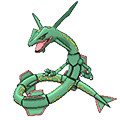

In [24]:
from IPython.display import Image 
pil_img = Image(filename=pokemon_full['image'].iloc[383])
display(pil_img)

In [25]:
# let's try to visualize the data, first by reducing its dimension to 2D
from sklearn.decomposition import PCA

dim_reducer = PCA()

dim_reducer.fit(pokemon_full[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].values)

PCA()

In [26]:
# the first two principal components have an explained variance ratio of 43.6% and 18.9% respectively
dim_reducer.explained_variance_ratio_

array([0.43641978, 0.1897552 , 0.1427041 , 0.1097885 , 0.07589092,
       0.04544151])

In [27]:
# now let's take the principal components and see what information they hold

result = dim_reducer.transform(pokemon_full[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].values)
pokemon_full['pca-one'] = result[:,0]
pokemon_full['pca-two'] = result[:,1]
pokemon_full['pca-three'] = result[:,2]

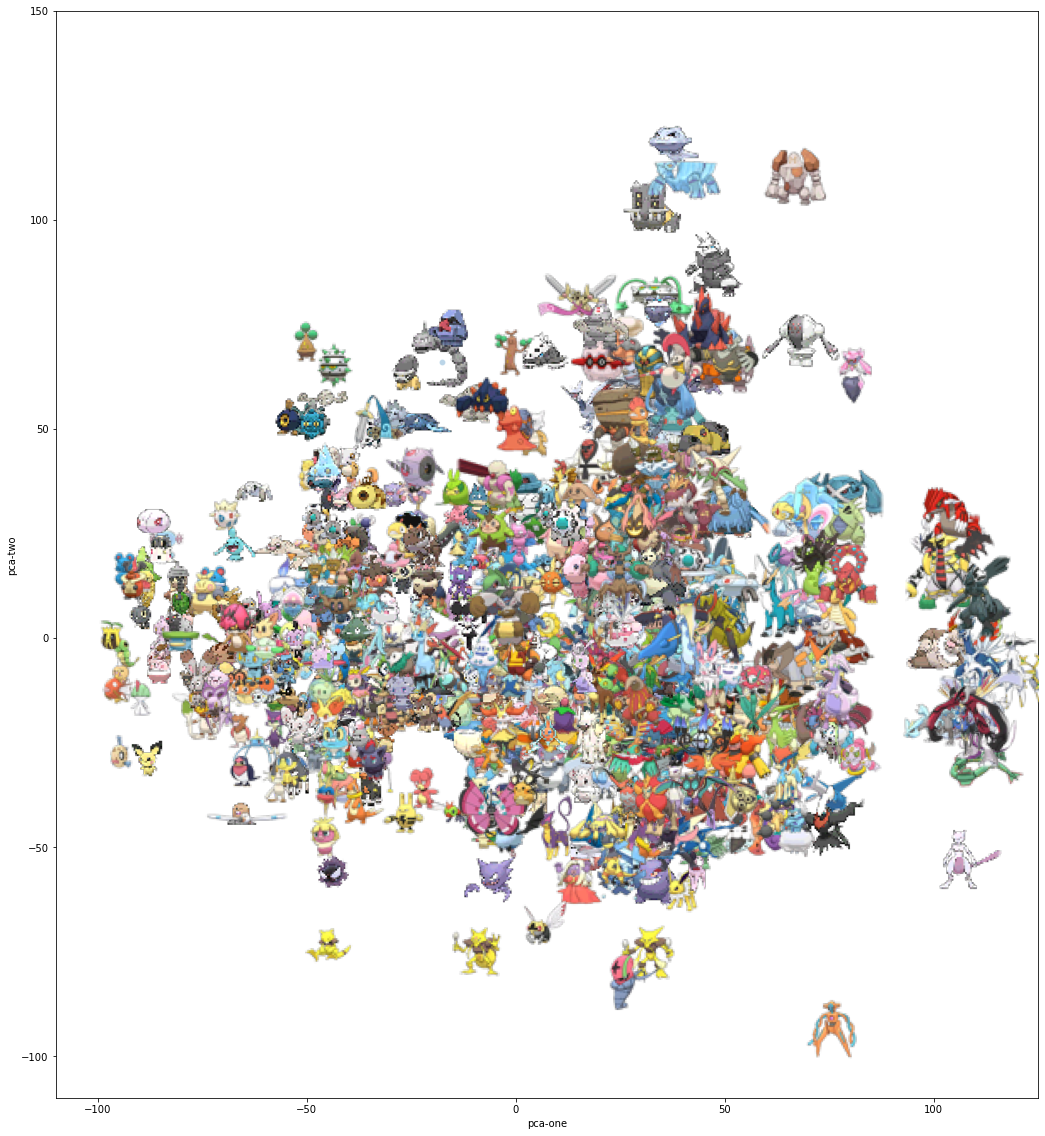

In [30]:
# now let's visualize the pokemon based on their first two principal components
from PIL import Image
plt.figure(figsize=(32,20))
plt.xlim([-110,125])
plt.ylim([-110,150])

sns.scatterplot(
    x='pca-one', y='pca-two',
    data=pokemon_full,
    palette='bright',
    legend="full",
    alpha=0.3,
    zorder=0
)

for index,row in pokemon_full.iterrows():
    plt.imshow(Image.open(row.image).resize((50,50)),zorder=5,extent=(row['pca-one']-10,row['pca-one']+10,row['pca-two']-10,row['pca-two']+10))

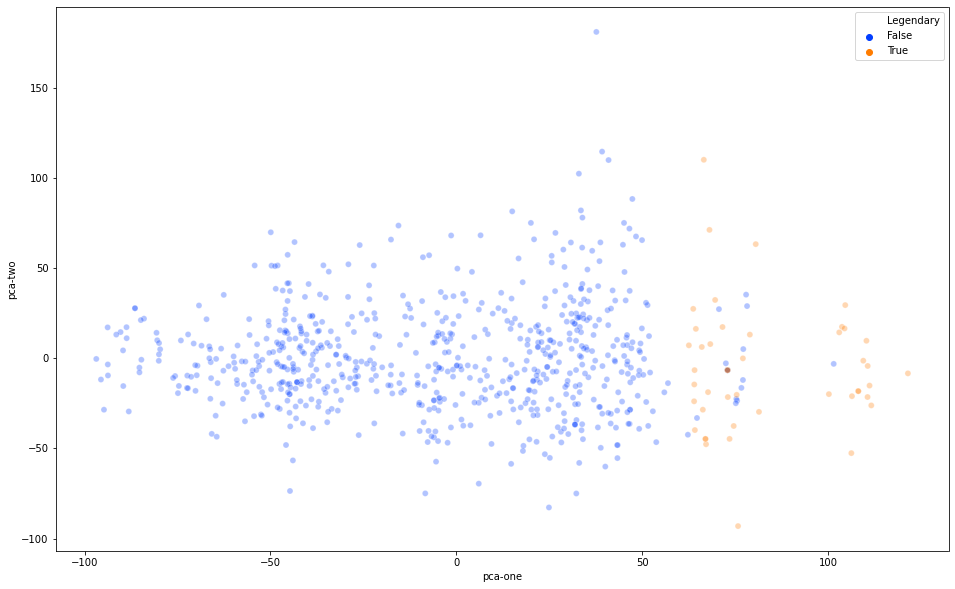

In [31]:
# lookin also at the other groupings, we can see that those pokemon classified as legendary score much higher in the first principal component but possess
# similar variation in the second

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='pca-one', y='pca-two',
    hue='Legendary',
    data=pokemon_full,
    palette='bright',
    legend="full",
    alpha=0.3,
    zorder=0
)

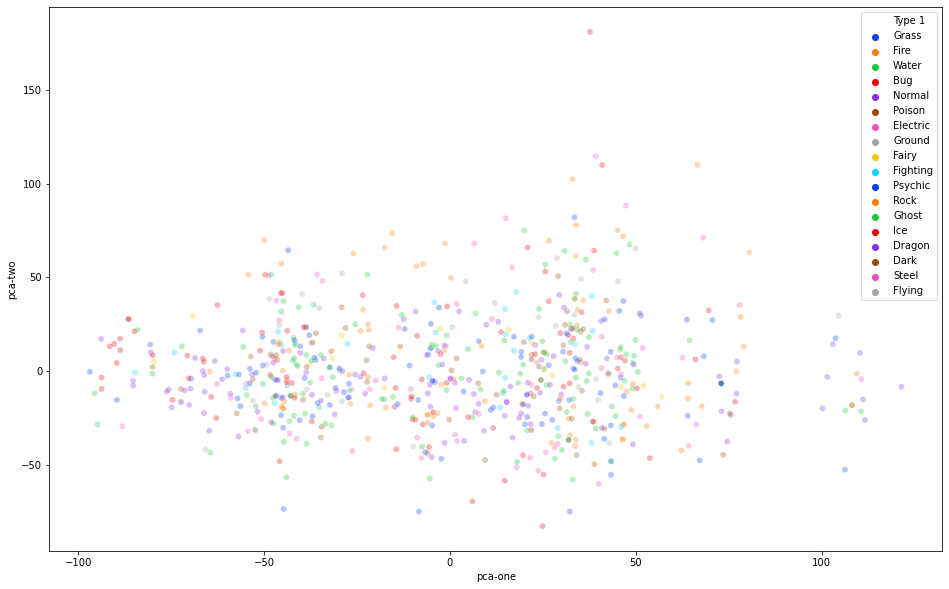

In [33]:
# as one might expect, there is significant diversity in the quality of pokemon across typings

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='pca-one', y='pca-two',
    hue='Type 1',
    data=pokemon_full,
    palette='bright',
    legend="full",
    alpha=0.3
)

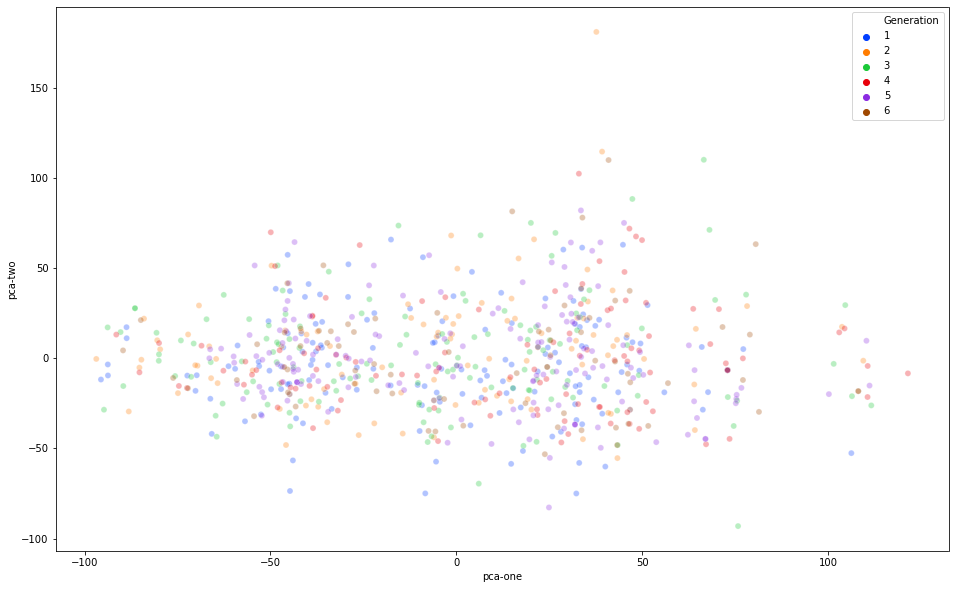

In [34]:
# as one might expect, there is significant diversity in the quality of pokemon across the generations in which they were released
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='pca-one', y='pca-two',
    hue='Generation',
    data=pokemon_full,
    palette='bright',
    legend="full",
    alpha=0.3
)

In [58]:
# commonly, people have general archetypes that they use to classify pokemon, but this is not so formal.
# In this section, we try clustering to be able to identify typical groupings people use (bulky, glass cannon, pseudo-legendary, etc.)
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters=6).fit(pokemon_full[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].values) # tuned for number of clusters; 6 appeared best

In [59]:
#update the pokemon full view witht the clustering labels
pokemon_full['Cluster'] = clustering.labels_

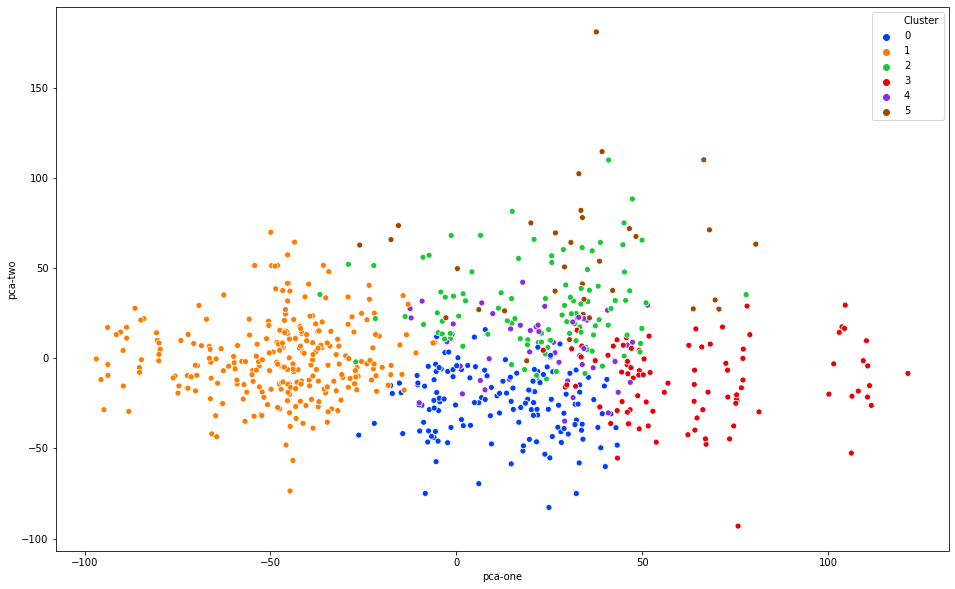

In [96]:
# using the hue from the new Cluster column, let's see the groupings it produced

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='pca-one', y='pca-two',
    hue='Cluster',
    data=pokemon_full,
    palette='bright',
    legend="full"
)

It appears that the clustering has carried over relatively smoothly from 6 dimensions to 2 dimensions -- particularly, the red, orange, and blue pokemon are relatively well-separated from the other classes.

In [ ]:
# grabbed list of all final evolutions from this site: https://bulbapedia.bulbagarden.net/wiki/List_of_fully_evolved_Pok%C3%A9mon_by_base_stats
# to be used to reduce noise in the visual and evaluate pokemon for their competitive usability (assuming people would not use earlier stages of a pokemon)
fully_evolved = pd.read_csv(r"/kaggle/input/pokemon-fully-evolved/fully_evolved.csv")
# remove duplicates in serial number from the fully evolved file
fully_evolved.drop_duplicates(inplace=True)

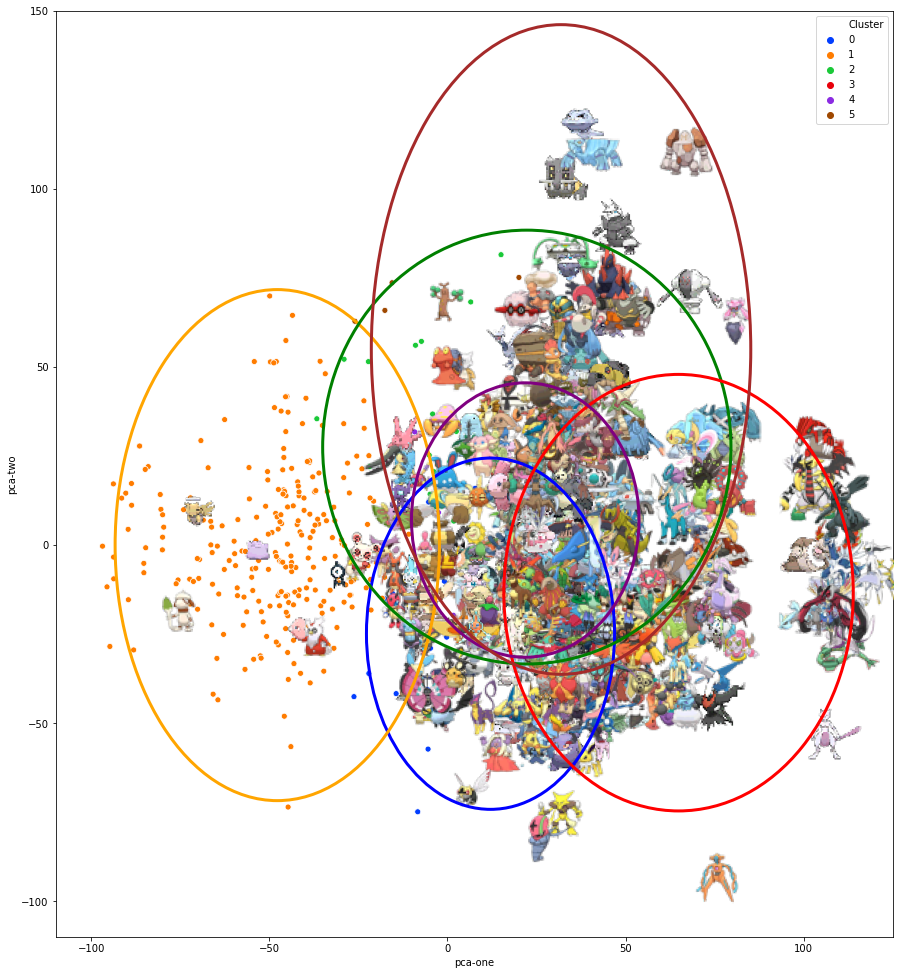

In [142]:
# now let's overlay the images of the pokemon to dive deeper into the clusters
from matplotlib.patches import Ellipse


plt.figure(figsize=(15,30))
sns.scatterplot(
    x='pca-one', y='pca-two',
    hue='Cluster',
    data=pokemon_full,
    palette='bright',
    legend="full"
)

plt.xlim([-110,125])
plt.ylim([-110,150])

for index,row in pokemon_full[[pokemon in fully_evolved['#'].tolist() for pokemon in pokemon_full['#'].tolist()]].iterrows():
    plt.imshow(Image.open(row.image).resize((50,50)),zorder=5,extent=(row['pca-one']-10,row['pca-one']+10,row['pca-two']-10,row['pca-two']+10))

centroids = clustering.cluster_centers_
for enum,color in zip(enumerate(centroids),['blue','orange','green','red','purple','brown']):
    ind = enum[0]
    i = enum[1]
    data_for_class = pokemon_full[pokemon_full['Cluster']==ind][['pca-one','pca-two']]
    
    # compute average in 2d space and diameter of class
    max_horiz_dist=np.max(data_for_class['pca-one'].values)-np.min(data_for_class['pca-one'].values)
    max_vert_dist=np.max(data_for_class['pca-two'].values)-np.min(data_for_class['pca-two'].values)
    avg_2d = [data_for_class['pca-one'].mean(),data_for_class['pca-two'].mean()]
    
    plt.gca().add_artist(Ellipse(avg_2d,max_horiz_dist,max_vert_dist, fill=False,zorder=10,color=color,linewidth=3))

# Conclusions:
From visual inspection, it appears that the clusters roughly correspond to the following:
1. Cluster 0 (blue): the "Glass cannons" being those pokemon with high attack but low defense
2. Cluster 1 (orange): the pre-evolutions and "gimmicky" pokemon that are overall weak 
3. Cluster 2 (green): mostly average pokemon, with significant overlap with Cluster 4 and 5
4. Cluster 3 (red): the "ubers" -- legendaries with high overall stats, regular pokemon with relatively high stats (would likely see these in competitions)
5. Cluster 4 (purple): the "decent" pokemon--these are average with respect to both principal components and have pretty average stats
6. Cluster 5 (brown): the "bulky" pokemon--these have high defense but tend to have average attack; these can take a few hits